In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
import os
my_path = os.path.abspath('images')
my_path+='/'

In [5]:
import imageio

In [6]:
from IPython.display import Image
from IPython.core.display import Image, display

In [7]:
df = pd.read_csv('data.csv')
df.rename(columns={'32.502345269453031':'data1','31.70700584656992':'data2'},inplace=True)

In [8]:
df.head(5)


,data1,data2
0,53.426804,68.777596
1,61.530358,62.562382
2,47.475640,71.546632
3,59.813208,87.230925
4,55.142188,78.211518


In [9]:
df['data1'][0]

53.426804033275026

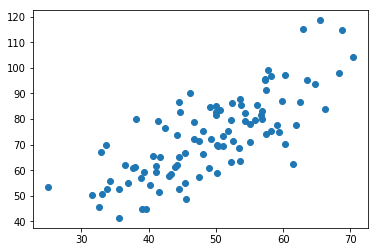

In [10]:
plt.scatter(df['data1'],df['data2'])

In [11]:
list_m = []
list_c = []

In [12]:
def gradient_current_m_and_current_c(m,c,df,learning_rate):
    #differtiation wrt theta0
    c_gradient=0
    #differentaition wrt theta1
    m_gradient=0
    N = (len(df))
    for i in range(0,len(df)):
        c_gradient+=2/N*(c+m*df['data1'][i]-df['data2'][i])
        m_gradient+=2/N*((c+m*df['data1'][i]-df['data2'][i])*df['data1'][i])
    m_new = m - (learning_rate*m_gradient)
    c_new = c - (learning_rate*c_gradient)
    return [m_new,c_new]

In [13]:
def run_iterations(m,c,df,iterations,learning_rate):
    for i in range(0,iterations):
        list_1 = list()
        list_1=gradient_current_m_and_current_c(m,c,df,learning_rate)
        m=list_1[0]
        c=list_1[1]
        list_m.append(list_1[0])
        list_c.append(list_1[1])
    return [list_1[0],list_1[1]]


In [14]:
final_value = list()
final_value = run_iterations(0,0,df,100,0.00001)

In [15]:
def error_coeffecient(m,c,df):
    total_error = 0;
    for i in range(len(df)):
        total_error+=((m*df['data1'][i]+c) - df['data2'][i])**2
    return total_error/len(df)    

In [16]:
def y_for_given_slope_and_intercept(m,c):
    return [m*i + c for i in range(100)]

In [17]:
def plot_line_given_m_and_x(m,x,name_fig):
    b = list(range(100))
    a = y_for_given_slope_and_intercept(m,x)
    fig = plt.figure()
    axes = fig.add_axes([.1,.1,.8,.8])
    axes.plot(b,a)
    axes.scatter(df['data1'],df['data2'])
    fig.savefig(my_path+str(name_fig)+'.png')
    plt.close()

In [18]:
count = 0
for i,j in zip(list_m,list_c):
    plot_line_given_m_and_x(i,j,count)
    count+=1

In [19]:
#Making gif
images = []
for i in range(100):
    images.append(imageio.imread(my_path+str(i)+'.png'))
imageio.mimsave(my_path+'test.gif', images)

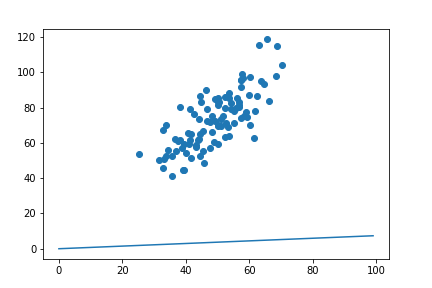

In [20]:

display(Image(filename=my_path+'test.gif'))

<img src="images/test.gif">

In [21]:
print(error_coeffecient(final_value[0],final_value[1],df))

111.25056079777497
